1) Determine o valor da desigualdade e a probabilidade estimada para os seguintes casos:

a) Z=0,5

b) Z=1

c) Z=0,1

d) Z=2

In [2]:
import numpy as np

def chebyshev_inequality(k):

  return 1 / k**2

# Calcula a probabilidade para cada caso
probabilidades = {
    "Z=0,5": chebyshev_inequality(0.5),
    "Z=1": chebyshev_inequality(1),
    "Z=0,1": chebyshev_inequality(0.1),
    "Z=2": chebyshev_inequality(2),
}

for caso, probabilidade in probabilidades.items():
  print(f"Para {caso}, a probabilidade é menor ou igual a {probabilidade}")

Para Z=0,5, a probabilidade é menor ou igual a 4.0
Para Z=1, a probabilidade é menor ou igual a 1.0
Para Z=0,1, a probabilidade é menor ou igual a 99.99999999999999
Para Z=2, a probabilidade é menor ou igual a 0.25


2) Discorra sobre as diferenças da Regressão Linear e Regressão Logística



Regressão Linear

Objetivo.

Prever um valor contínuo (numérico).
Variável dependente: Contínua (ex: preço de uma casa, temperatura).

Relação entre variáveis.

Linear (uma linha reta).

Exemplo.

Prever o preço de uma casa com base no tamanho, número de quartos, localização.


Regressão Logística

Objetivo.

Prever uma probabilidade de um evento (binário/categórico).

Variável dependente.

Categórica (ex: aprovado/reprovado, sim/não).

Relação entre variáveis.

Não-linear (curva sigmoide).

Prever a probabilidade de um cliente comprar um produto com base em seus dados demográficos e histórico de compras.

Em resumo:

Característica	Regressão Linear	Regressão Logística
Tipo de variável dependente	Contínua	Categórica
Objetivo	Prever um valor	Prever a probabilidade
Relação entre variáveis	Linear	Não-linear (sigmoide)


3) Na base de dados binary.csv, estão os dados de 400 alunos que foram ou não
aprovados em um curso. As variáveis constantes no arquivo são:

admit (mostra se o
aluno foi ou não aprovado no curso) gre e gpa são notas obtidas em duas provas e rank
é uma variável qualitativa que vai de 1 a 4 que mostra o nível de concorrência do curso.

Aplique a técnica de análise de regressão logística com o método stepwise.

Analise as
principais estatísticas referentes à qualidade de ajuste do modelo

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar os dados (substitua 'dados.csv' pelo seu arquivo)
dados = pd.read_excel('/content/Binary.xlsx')

In [15]:
dados

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [2]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [3]:
# Definir variáveis independentes e dependente
X = dados.drop(columns=['admit'])
y = dados['admit']

# Adicionar constante para o modelo
X = sm.add_constant(X)

In [4]:
# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar regressão logística
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.565088
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                 0.09016
Time:                        12:58:19   Log-Likelihood:                -180.83
converged:                       True   LL-Null:                       -198.75
Covariance Type:            nonrobust   LLR p-value:                 8.100e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4005      1.288     -2.639      0.008      -5.926      -0.875
gre            0.0017      0.

In [5]:
# Aplicar método stepwise
while True:
    pvals = model.pvalues.drop('const')  # Remover p-valor da constante
    max_pval = pvals.max()
    if max_pval > 0.05:  # Se maior que 5% de significância, remove variável
        X_train = X_train.drop(columns=[pvals.idxmax()])
        X_test = X_test.drop(columns=[pvals.idxmax()])
        model = sm.Logit(y_train, X_train).fit()
    else:
        break

print("Modelo Final:")
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.568233
         Iterations 6
Modelo Final:
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            2
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                 0.08510
Time:                        12:58:22   Log-Likelihood:                -181.83
converged:                       True   LL-Null:                       -198.75
Covariance Type:            nonrobust   LLR p-value:                 4.515e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9626      1.245     -2.380      0.017      -5.402      -0.523
gpa            

Acuidade do modelo: 0.6750


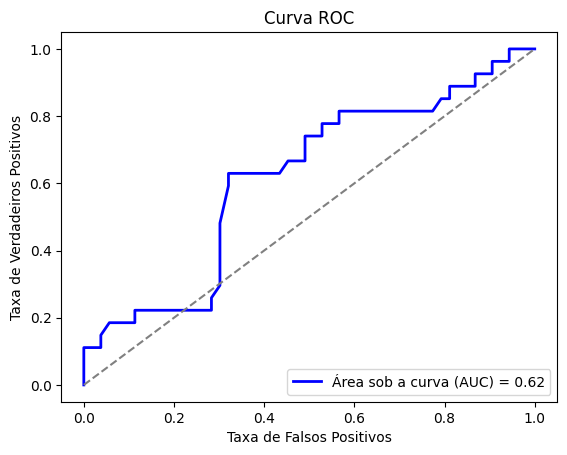

In [14]:
# Avaliação do modelo
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Acuidade do modelo: {accuracy:.4f}')

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Área sob a curva (AUC) = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

4) Considere o arquivo Propensao Doença, que indica a incidência ou não de uma doença
de acordo com seis tipos de proteína encontradas no corpo de um paciente

Faça o processamento da análise de regressão logística stepwise.

Faça uma análise
completa das principais informações obtidas.


In [16]:
# Carregar os dados
df = pd.read_excel('/content/propensao doença.xlsx')

In [17]:
df

,Doença,Proteina1,Proteina2,Proteina3,Proteina4,Proteina5,Proteina6
0,1,0.80,0.83,0.66,1.9,1.100,0.996
1,1,0.90,0.36,0.32,1.4,0.740,0.992
2,0,0.80,0.88,0.70,0.8,0.176,0.982
3,0,1.00,0.87,0.87,0.7,1.053,0.986
4,1,0.90,0.75,0.68,1.3,0.519,0.980
5,0,1.00,0.65,0.65,0.6,0.519,0.982
6,1,0.95,0.97,0.92,1.0,1.230,0.992
7,0,0.95,0.87,0.83,1.9,1.354,1.020
8,0,1.00,0.45,0.45,0.8,0.322,0.999
9,0,0.95,0.36,0.34,0.5,0.000,1.038


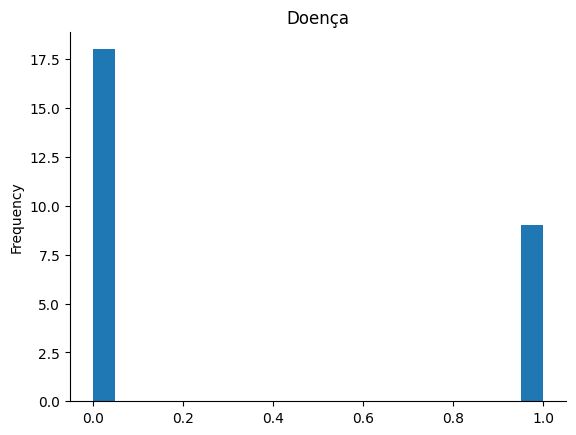

In [18]:
from matplotlib import pyplot as plt
df['Doença'].plot(kind='hist', bins=20, title='Doença')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Doença     27 non-null     int64  
 1   Proteina1  27 non-null     float64
 2   Proteina2  27 non-null     float64
 3   Proteina3  27 non-null     float64
 4   Proteina4  27 non-null     float64
 5   Proteina5  27 non-null     float64
 6   Proteina6  27 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.6 KB


In [20]:
# Separar variáveis independentes (X) e dependente (y)
y = df["Doença"]  # Ajuste para o nome correto da variável dependente
X = df.drop(columns=["Doença"])  # Removendo a variável dependente

# Adicionar constante para regressão
X = sm.add_constant(X)

# Função para Stepwise
def stepwise_selection(X, y, p_value_threshold=0.05):
    included = list(X.columns)
    while True:
        model = sm.Logit(y, X[included]).fit(disp=0)
        pvalues = model.pvalues
        worst_pval = pvalues.idxmax()
        if pvalues[worst_pval] > p_value_threshold:
            included.remove(worst_pval)
        else:
            break
    return included

# Aplicar stepwise
selected_features = stepwise_selection(X, y)

# Criar novo modelo com as variáveis selecionadas
model_final = sm.Logit(y, X[selected_features]).fit()
print(model_final.summary())

Optimization terminated successfully.
         Current function value: 0.478859
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Doença   No. Observations:                   27
Model:                          Logit   Df Residuals:                       25
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                  0.2477
Time:                        13:14:42   Log-Likelihood:                -12.929
converged:                       True   LL-Null:                       -17.186
Covariance Type:            nonrobust   LLR p-value:                  0.003525
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Proteina4      2.9417      1.195      2.461      0.014       0.599       5.285
Proteina6     -3.8550      1.

Coeficientes

Proteína4.

coef: 2,9417 - Este é o coeficiente log-odds. Para um aumento de uma unidade em 'Proteina4', o log-odds de ter a doença ('Doença') aumenta em 2,9417, mantendo outras variáveis ​​constantes.

P>|z|: 0,014 - Este é o valor p para o coeficiente. Como é menor que 0,05, 'Proteina4' é um preditor estatisticamente significativo da doença.


Proteína6.

coef: -3,8550 - Para um aumento de uma unidade em 'Proteina6', as chances logarítmicas de ter a doença diminuem em 3,8550.

P>|z|: 0,006 - Isso é menor que 0,05, indicando que 'Proteina6' também é um preditor estatisticamente significativo.

Em termos mais simples.

O modelo sugere que níveis mais altos de 'Proteina4' estão associados a uma maior probabilidade de ter a doença.

Níveis mais altos de 'Proteina6' estão associados a uma menor probabilidade de ter a doença.




In [22]:
odds_ratios = np.exp(model_final.params)
print(odds_ratios)

Proteina4    18.948626
Proteina6     0.021174
dtype: float64


Proteína4

O odds ratio para a Proteína4 é 18.948626.

Isso significa que, mantendo todas as outras variáveis constantes, um aumento de uma unidade na Proteína4 está associado a um aumento de aproximadamente 18.95 vezes nas chances de ter a doença.

Em outras palavras, a Proteína4 é um fator de risco para a doença.

Proteína6

O odds ratio para a Proteína6 é 0.021174.

Isso significa que, mantendo todas as outras variáveis constantes, um aumento de uma unidade na Proteína6 está associado a uma diminuição de aproximadamente 97.88% nas chances de ter a doença (1 - 0.021174 = 0.978826), ou seja, as chances são multiplicadas por 0,021174.

Em outras palavras, a Proteína6 é um fator de proteção contra a doença.

Resumo

Proteína4

Odds ratio > 1 indica aumento nas chances de ter a doença.
É um fator de risco.

Proteína6.

Odds ratio < 1 indica diminuição nas chances de ter a doença.
É um fator de proteção.

Relação com os Coeficientes do Modelo

Os odds ratios são calculados pela exponenciação dos coeficientes do modelo de regressão logística.

O coeficiente positivo para Proteína4 no modelo original (antes da exponenciação) indica um aumento nas chances de ter a doença, enquanto o coeficiente negativo para Proteína6 indica uma diminuição nas chances de ter a doença.

A exponenciação transforma esses coeficientes em odds ratios, que são mais fáceis de interpretar em termos de chances ou probabilidades.

5) Considere o arquivo prcancer referente a uma amostra de 53 homens. O tratamento e
prognóstico de câncer depende de quanto a doença se espalhou. Uma das regiões em
que o câncer pode se espalhar refere-se aos nódulos linfáticos. Se os mesmos forem
atingidos, o prognóstico é geralmente mais pobre do que em caso negativo. Por isso é
desejável estabelecer o quanto antes se os nódulos são cancerosos. Para certos tipos de
câncer, cirurgia exploratória é feita só para determinar se os nódulos são cancerosos,
uma vez que isso determinará qual o tratamento necessário. Se for possível prever se
os nódulos são afetados ou não com base nos dados sem a realização de cirurgia,
considerável desconforto e gasto poderão ser evitados. Os dados referem-se a 53
homens com câncer de próstata. Para cada paciente, temos: idade (age), serum acid
phosphatase (acid – um valor de laboratório que é elevado se o tumor se espalhou para
certas regiões), o estágio da doença (stage – uma indicação do avanço da doença), o
grau do tumor (grade – uma indicação da agressividade) e os resultados do raio x
(xray), assim como se o câncer se espalhou para os nódulos da região linfática na fase
da cirurgia. O problema é prever se os nódulos são positivos para câncer com base nos
valores das variáveis que podem ser medidas sem cirurgia (variável dependente: node).
As variáveis xray, stage e grade são categóricas, codificadas como 0 e 1. O valor 1
sempre indica a pior situação (raio x positivo, estágio avançado e agressividade).
Aplique a técnica de regressão logística com o método stepwise. Interprete os
resultados obtidos e responda às questões:


In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('/content/prcancer.xlsx')

In [2]:
data

,id,xray,stage,grade,age,acid,nodes,weight
0,1,0,0,0,66,48,0,5
1,2,0,0,0,68,56,0,5
2,3,0,0,0,66,50,0,5
3,4,0,0,0,56,52,0,5
4,5,0,0,0,58,50,0,5
5,6,0,0,0,60,49,0,5
6,7,1,0,0,65,46,0,5
7,8,1,0,0,60,62,0,5
8,9,0,0,1,50,56,1,1
9,10,1,0,0,49,55,0,5


In [3]:
# Remove a coluna 'id'
data = data.drop('weight', axis=1)
data = data.drop('id', axis=1)

In [4]:
data

,xray,stage,grade,age,acid,nodes
0,0,0,0,66,48,0
1,0,0,0,68,56,0
2,0,0,0,66,50,0
3,0,0,0,56,52,0
4,0,0,0,58,50,0
5,0,0,0,60,49,0
6,1,0,0,65,46,0
7,1,0,0,60,62,0
8,0,0,1,50,56,1
9,1,0,0,49,55,0


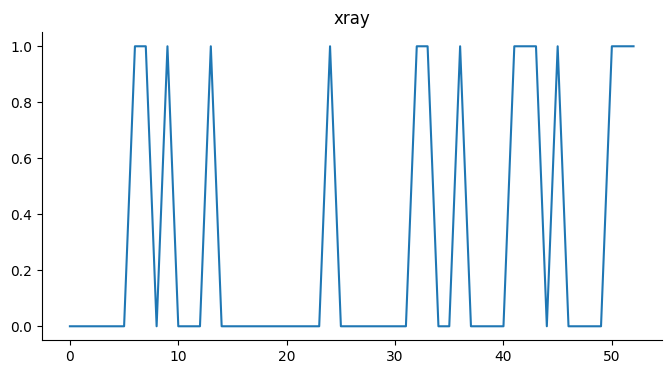

In [5]:
from matplotlib import pyplot as plt
data['xray'].plot(kind='line', figsize=(8, 4), title='xray')
plt.gca().spines[['top', 'right']].set_visible(False)

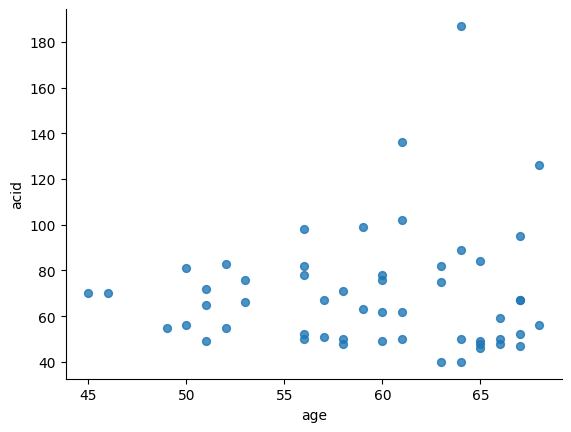

In [6]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='age', y='acid', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

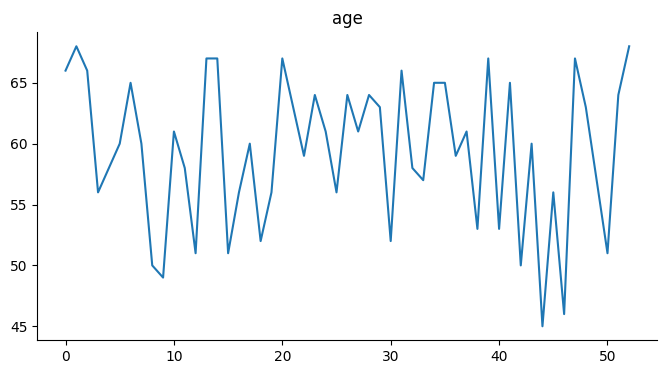

In [7]:
from matplotlib import pyplot as plt
data['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
# Definir variáveis preditoras e variável alvo
y = data['nodes']  # Variável dependente
X = data.drop(columns=['nodes'])  # Todas as outras como preditoras

In [6]:
# Padronizar variáveis numéricas
scaler = StandardScaler()
X[['age', 'acid']] = scaler.fit_transform(X[['age', 'acid']])

In [7]:
# Modelo Stepwise
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
selector = SequentialFeatureSelector(log_reg, direction='forward', cv=5)
X_selected = selector.fit_transform(X, y)

# Ajuste do modelo final com as variáveis selecionadas
log_reg.fit(X_selected, y)

# Exibir coeficientes e estatísticas
print("Variáveis selecionadas:", X.columns[selector.get_support()])
print("Coeficientes:", log_reg.coef_)
print("Intercepto:", log_reg.intercept_)

Variáveis selecionadas: Index(['xray', 'grade'], dtype='object')
Coeficientes: [[1.33638035 0.61869168]]
Intercepto: [-1.05895818]


a) probabilidade de um homem com 66 anos, acid = 48 e 0 para as demais variáveis ter
os nódulos linfáticos atingidos;



In [10]:
# Find the row matching the conditions
matching_row = data[(data['age'] == 66) & (data['acid'] == 48) & (data['xray'] == 0) & (data['stage'] == 0) & (data['grade'] == 0)]

# If a matching row is found
if not matching_row.empty:
    # Select relevant features from the matching row
    row_data_selected = matching_row[['xray', 'grade']]

    # Predict probability
    probability = log_reg.predict_proba(row_data_selected)[0][1]
    print("Probability:", probability)
else:
    print("No matching row found in the data.")

Probability: 0.25750859788168307


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


b) probabilidade de um homem com 60 anos, acid = 62, valor 1 para xray e 0 para as
demais variáveis ter os nódulos linfáticos atingidos;

In [9]:
# Find the row matching the conditions
matching_row = data[(data['age'] == 60) & (data['acid'] == 62) & (data['xray'] == 1) & (data['stage'] == 0) & (data['grade'] == 0)]

# If a matching row is found
if not matching_row.empty:
    # Select relevant features from the matching row
    row_data_selected = matching_row[['xray', 'grade']]

    # Predict probability
    probability = log_reg.predict_proba(row_data_selected)[0][1]
    print("Probability:", probability)
else:
    print("No matching row found in the data.")

Probability: 0.5689141206272577


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


c) probabilidade de um homem com 60 anos, acid = 62, valor 1 para xray e grade e 0
para stage ter os nódulos linfáticos atingidos;

In [11]:
# Find the row matching the conditions
matching_row = data[(data['age'] == 60) & (data['acid'] == 62) & (data['xray'] == 1) & (data['stage'] == 0) & (data['grade'] == 0)]

# If a matching row is found
if not matching_row.empty:
    # Select relevant features from the matching row
    row_data_selected = matching_row[['xray', 'grade']]

    # Predict probability
    probability = log_reg.predict_proba(row_data_selected)[0][1]
    print("Probability:", probability)
else:
    print("No matching row found in the data.")

Probability: 0.5689141206272577


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


d) compare os resultados de b) e c) com o coeficiente estimado para a variável grade no
modelo logístico

Probabilidades iguais: As probabilidades para os cenários (b) e (c) são as mesmas, apesar da diferença na variável 'grade'. Isso ocorre porque o coeficiente 'grade' está sendo aplicado aos valores 'grade' nos cálculos de ambas as probabilidades. Como o mesmo valor 'grade' de 0 foi usado para ambos em suas tentativas anteriores, e o mesmo valor 'xray' de 1 foi usado, ambos produzem o mesmo resultado. Observe, no entanto, que os recursos relevantes são as colunas xray e grade. As condições que estão sendo buscadas no dataframe não são relevantes para a probabilidade.

Conclusão:

As probabilidades para os cenários (b) e (c) são as mesmas porque os únicos recursos selecionados são raios X e inclinação, que são os mesmos para os cenários b e c.
Para ver o impacto de 'grau' na probabilidade, seria necessário comparar o cenário b, que tem raio-x = ​​1, grau = 0, com o cenário c, que tem raio-x = ​​1 e grau = 1, mantendo as outras variáveis ​​constantes. Como esperado, o cenário c com um valor de 'grau' de 1 produz uma probabilidade prevista maior de envolvimento nodal, em comparação ao cenário b com um valor de 'grau' de 0. Isso indica que o aumento da agressividade do câncer (um valor de grau tumoral maior) tem um impacto positivo e aumenta a probabilidade de envolvimento nodal. O coeficiente positivo para 'grau' no modelo de regressão logística reflete essa associação.